In [2]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from env.balloon import Balloon, WindVector

You can change time step / initial position / amount of initial resources as you want! 

In [3]:
# Simulation parameters
dt = 120  # Time step in seconds
num_steps = 10  # Number of time steps to simulate (simulation time = dt * num_steps)

# Ithaca, NY
initial_lat = 42.6  # Initial latitude (degrees)
initial_lon = -76.50  # Initial longitude (degrees)
initial_alt = 10  # Initial altitude (km)
# Initial resources
initial_volume = 1000.0  # Initial volume (m³)
initial_sand = 100  # Initial sand mass (kg)
# initial_volume = 1000.0  # Initial volume (m³)
# initial_sand = 100.0  # Initial sand mass (kg)
print("Simulation Parameters:")
print(f"Time step (dt): {dt} seconds")
print(f"Initial position: ({initial_lat}°, {initial_lon}°)")
print(f"Initial altitude: {initial_alt} km")
print(f"Initial volume: {initial_volume} m³")
print(f"Initial sand: {initial_sand} kg")

# Create balloon instance
balloon = Balloon(
    initial_lat=initial_lat,
    initial_lon=initial_lon,
    initial_alt=initial_alt,
    initial_volume=initial_volume,
    initial_sand=initial_sand
)
initial_helium = balloon.helium_mass
print("\nBalloon created successfully!")
print(f"Initial helium mass: {balloon.helium_mass:.2f} kg")
print(f"Max volume (burst limit): {balloon.max_volume} m³")

Simulation Parameters:
Time step (dt): 120 seconds
Initial position: (42.6°, -76.5°)
Initial altitude: 10 km
Initial volume: 1000.0 m³
Initial sand: 100 kg

Balloon created successfully!
Initial helium mass: 178.60 kg
Max volume (burst limit): 1500.0 m³


You can change 

In [4]:
# Resource usage
## case 1: No helium venting, No sand dropping
dHelium = 0.0  
dSand = 0.0   
## case 2: vent gas -> balloon volume decrease -> buoyancy decrease -> going down
# dHelium = initial_helium * 0.01 
# dSand = 0.0    
## case 3: drop sand -> weight decrease -> going up
# dHelium = 0.0  
# dSand = initial_sand * 0.01   

'''
Generate wind vector
wind[0]: + → eastward - → westward
wind[1]: + → northward - → southward
'''
## No wind
# wind = WindVector(0.0, 0.0) # m/s
## Wind toward east
wind = WindVector(10.0, 0.0) # m/s
## Wind toward north
# wind = WindVector(0.0, 10.0) # m/s
## Wind toward east and north
# wind = WindVector(10.0, 5.0) # m/s

# Arrays to store trajectory data
times = np.arange(0, num_steps * dt, dt)
altitudes = []
latitudes = []
longitudes = []
volumes = []
helium_masses = []
sand_masses = []
forces = []
print(f"Running simulation for {num_steps} steps with dt={dt}s...")
print(f"Total simulation time: {num_steps * dt} seconds ({num_steps * dt / 3600:.2f} hours)")

# Store initial state
altitudes.append(balloon.alt)
latitudes.append(balloon.lat)
longitudes.append(balloon.lon)
volumes.append(balloon.volume)
helium_masses.append(balloon.helium_mass)
sand_masses.append(balloon.sand)

Running simulation for 10 steps with dt=120s...
Total simulation time: 1200 seconds (0.33 hours)


In [5]:
# Run simulation
for step in range(num_steps):
    # Run one step
    result = balloon.step_with_resource(dt, dHelium, dSand, wind)
    
    # # Check if simulation ended due to resource depletion
    if result[0] is not None:  # Resource depletion message
        print(f"\nSimulation stopped at step {step + 1}: {result[0]}")
        break
        
    altitudes.append(balloon.alt)
    latitudes.append(balloon.lat)
    longitudes.append(balloon.lon)
    volumes.append(balloon.volume)
    helium_masses.append(balloon.helium_mass)
    sand_masses.append(balloon.sand)
    forces.append(result[3])
    if step == 0:
        forces.append(result[3])
    
    # Progress indicator
    if (step + 1) % 20 == 0:
        print(f"Completed step {step + 1}/{num_steps}")

print("\nSimulation completed!")
print(f"Final altitude: {balloon.alt:.3f} km")
print(f"Final position: ({balloon.lat:.6f}°, {balloon.lon:.6f}°)")
print(f"Final volume: {balloon.volume:.2f} m³")
print(f"Remaining helium: {balloon.helium_mass:.2f} kg")
print(f"Remaining sand: {balloon.sand:.2f} kg")



Simulation completed!
Final altitude: 10.896 km
Final position: (43.062286°, -76.500000°)
Final volume: 1199.51 m³
Remaining helium: 178.60 kg
Remaining sand: 100.00 kg


In [6]:
# Run simulation
for step in range(num_steps):
    # Run one step
    result = balloon.step_with_resource(dt, dHelium, dSand, wind)
    
    # # Check if simulation ended due to resource depletion
    if result[0] is not None:  # Resource depletion message
        print(f"\nSimulation stopped at step {step + 1}: {result[0]}")
        break
        
    altitudes.append(balloon.alt)
    latitudes.append(balloon.lat)
    longitudes.append(balloon.lon)
    volumes.append(balloon.volume)
    helium_masses.append(balloon.helium_mass)
    sand_masses.append(balloon.sand)
    forces.append(result[3])
    if step == 0:
        forces.append(result[3])
    
    # Progress indicator
    if (step + 1) % 20 == 0:
        print(f"Completed step {step + 1}/{num_steps}")

print("\nSimulation completed!")
print(f"Final altitude: {balloon.alt:.3f} km")
print(f"Final position: ({balloon.lat:.6f}°, {balloon.lon:.6f}°)")
print(f"Final volume: {balloon.volume:.2f} m³")
print(f"Remaining helium: {balloon.helium_mass:.2f} kg")
print(f"Remaining sand: {balloon.sand:.2f} kg")



Simulation stopped at step 9: Balloon burst

Simulation completed!
Final altitude: 11.856 km
Final position: (43.478344°, -76.500000°)
Final volume: 1500.33 m³
Remaining helium: 178.60 kg
Remaining sand: 100.00 kg


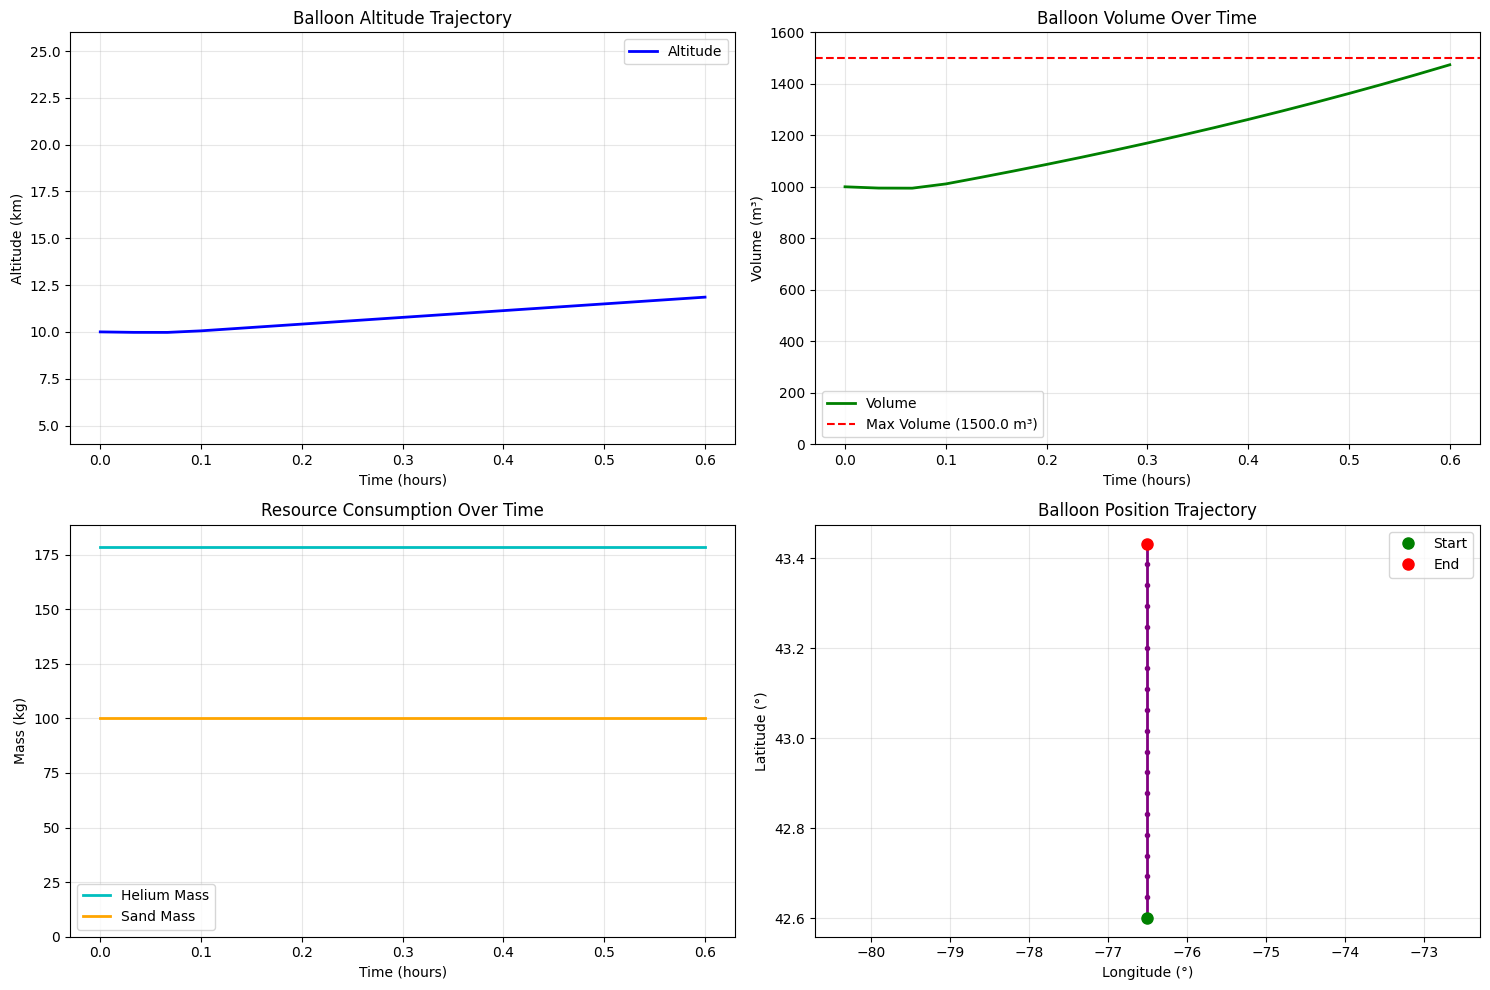

In [7]:
from plot_figure import BalloonSummaryPlotter

plotter = BalloonSummaryPlotter(
    altitudes, volumes, helium_masses, sand_masses,
    longitudes, latitudes, dt, balloon
)
plotter.plot()

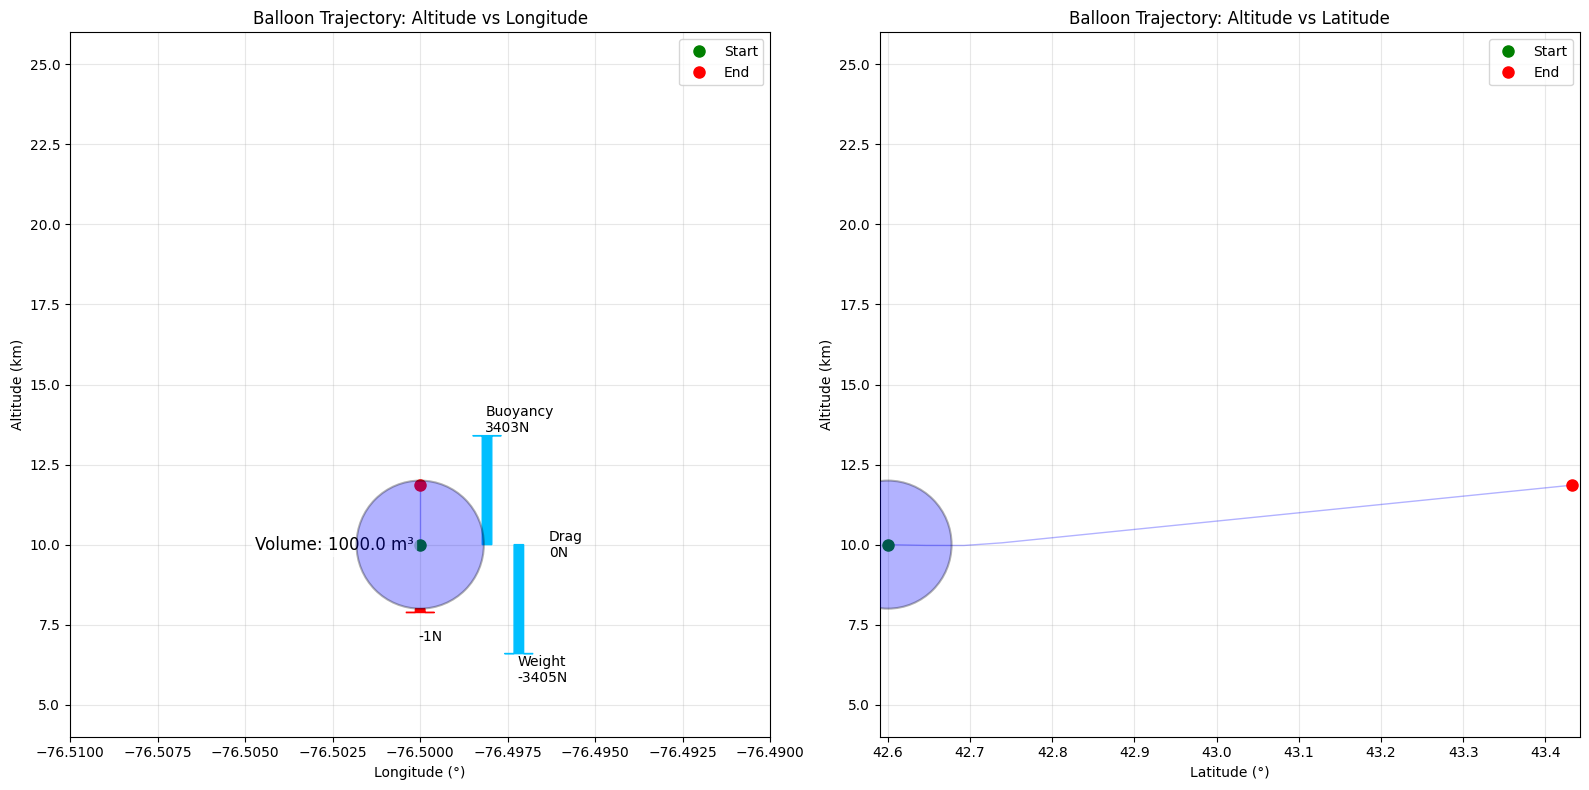

In [8]:
from plot_figure import BalloonTrajectoryAnimator
animator = BalloonTrajectoryAnimator(longitudes, latitudes, altitudes, volumes, forces)
animator.animate()
animator.save('balloon_trajectory.gif', fps=2)